# Sampling Basics 

In [22]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9
from matplotlib import rcParams
rcParams["font.serif"] = "cmr14"
rcParams['savefig.dpi'] = 300
rcParams["figure.dpi"] = 100
rcParams.update({'font.size': 18})
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.0

## We measure a signal every second an get this plot
* What would you predict the signal to be?

TypeError: title() missing 1 required positional argument: 'label'

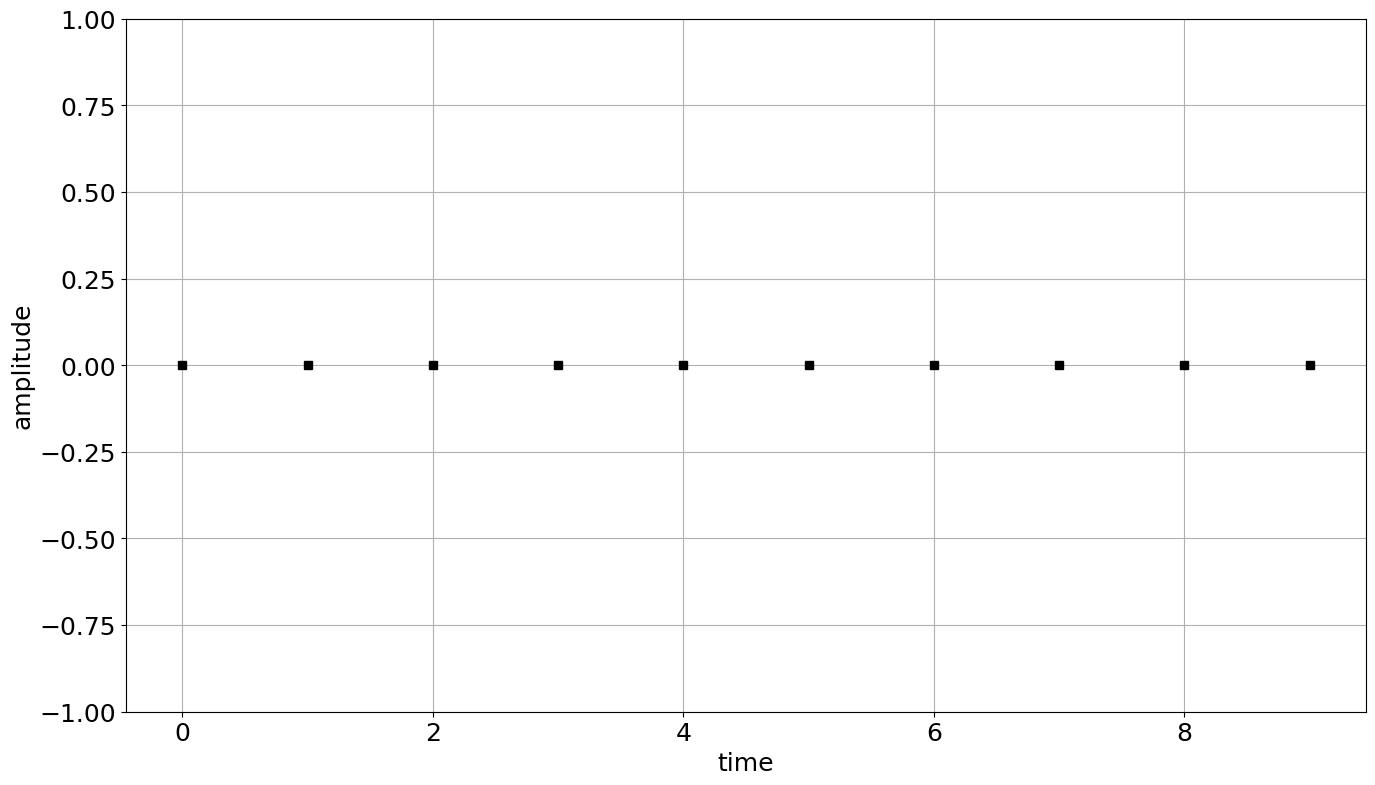

In [23]:
Ts = np.arange(10)
Data = 0*Ts

fig,ax = plt.subplots()
ax.plot(Ts,Data,'ks')
ax.set_ylim(-1,1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title()
plt.show()
fig.savefig('./data/Sampling_001.png', bbox_inches='tight', dpi=300)

## Constant signal $y=0$ is a natural choice, but other options exist

In [ ]:
f = 0.5  # Hz, signal frequency
t = np.arange(0,10,1/1000) # sample interval, symmetric for convenience later
y = np.sin(2*np.pi*f*t)

fig,ax = plt.subplots()
ax.plot(t,y,'k--')
ax.plot(Ts,Data,'ks')
ax.set_ylim(-1,1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.show()
fig.savefig('./data/Sampling_002.png', bbox_inches='tight', dpi=300)

## Actually many options...

In [ ]:
y2 = np.sin(2*np.pi*2*f*t)
y4 = np.sin(2*np.pi*4*f*t)
y8 = np.sin(2*np.pi*8*f*t)

fig,ax = plt.subplots()
ax.plot(t,y,'k--')
ax.plot(t,y2,'c--')
ax.plot(t,y4,'r--')
ax.plot(t,y8,'y--')
ax.plot(Ts,Data,'ks')
ax.set_ylim(-1,1)
ax.set_xlim(0,2.1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.show()
fig.savefig('./data/Sampling_003.png', bbox_inches='tight', dpi=300)